# Anomaly detection trhough Autoencoders model

# Import


In [23]:
#import necessary libraries
import os
import math

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load Dataset

## EngineFaultDB: A Novel Dataset for Automotive Engine Fault Classification and Baseline Results

* **About the project**

This paper introduces EngineFaultDB, a novel dataset capturing the intricacies of automotive engine diagnostics. Centered around the widely represented C14NE spark ignition engine, data was collected under controlled laboratory conditions, simulating various operational states, including normal and specific fault scenarios. Utilizing tools such as an NGA 6000 gas analyzer and a USB 6008 data acquisition card from National Instruments, we were able to monitor and capture a comprehensive range of engine parameters, from throttle position and fuel consumption to exhaust gas emissions. Our dataset, comprising 55,999 meticulously curated entries across 14 distinct variables, provides a holistic picture of engine behavior, making it an invaluable resource for automotive researchers and practitioners. For evaluation, several classifiers, including logistic regression, decision trees, random forests, support vector machines, k-nearest neighbors, and a feed-forward neural network, were trained on this dataset. Their performance, under standard configurations and a simple neural network architecture, offers foundational benchmarks for future explorations. Results underscore the dataset's potential in fostering advanced diagnostic algorithms. As a testament to our commitment to open research, EngineFaultDB is freely available for academic and industrial use. Future work involves expanding the dataset's diversity, exploring deeper neural architectures, and integrating real-world automotive conditions.

* **Variables dictionary**

Data set description
This dataset consists of 55,999 entries spanning across 14 distinct variables, capturing both standard operational metrics and specific fault conditions.
Regarding the variables of the dataset, these are:

* Manifold Absolute Pressure (MAP): A measure of the pressure within the intake manifold, crucial for the engine's electronic control system to regulate fuel injection and ignition timing, measured in kilopascals (kPa).
* Throttle Position Sensor (TPS): Provides information about the position of the throttle, influencing fuel injection, ignition timing, and other engine parameters. It is measured as a percentage.
* Force: Represents the engine's torque or rotational force. It is measured in newtons (N).
* Power: Quantifies the rate at which work is done or energy is transferred in the engine. It is measured in kilowatts (kW).
* Revolutions Per Minute (RPM): Indicates the engine's speed, detailing how many times the engine's crankshaft rotates per minute.
* Fuel consumption L/H: Illustrates the engine's fuel consumption rate.
* Fuel consumption L/100KM: Relays the engine's fuel efficiency over a given distance.
* Speed (km/h): The vehicle's travel speed.
* Carbon monoxide (CO): CO concentration in the exhaust gases. It is measured as a percentage.
* Hydrocarbons (HC): Concentration of unburnt hydrocarbons in the exhaust. It is measured in parts per million (ppm).
* Carbon dioxide (CO2): CO2 concentration in the exhaust, indicative of combustion efficiency. It is measured as a percentage.
* Oxygen (O2): Oxygen amount in the exhaust, offering insights into the combustion process. It is measured as a percentage.
* Lambda: The air-fuel equivalence ratio.
* Air-Fuel Ratio (AFR): Ratio of air to fuel in the combustion chambers

In [2]:
data_path = '../01_Datasets/EngineFaultDB_Final.csv'
df = pd.read_csv(data_path)
df.head()

Fault    MAP    TPS  Force  Power       RPM  Consumption L/H  \
0      0  3.549  1.889  7.428  5.227  1192.769            3.057   
1      0  3.559  1.899  7.646  5.327  1145.191            2.914   
2      0  3.539  1.899  7.578  5.100  1208.505            2.976   
3      0  3.519  1.889  7.371  5.255  1164.127            2.908   
4      0  3.549  1.879  7.405  5.177  1172.032            2.898   

   Consumption L/100KM   Speed     CO       HC     CO2     O2  Lambda     AFR  
0               11.720  24.901  0.460  196.089  14.356  1.080   1.047  15.385  
1               11.276  25.030  0.478  196.283  14.492  1.107   1.083  15.926  
2               11.926  24.213  0.464  200.367  14.443  1.099   1.072  15.754  
3               11.786  24.407  0.471  195.345  13.853  1.076   1.006  14.787  
4               12.169  24.875  0.468  194.979  13.752  1.060   0.984  14.470

# Univariate Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                55999 non-null  int64  
 1   MAP                  55999 non-null  float64
 2   TPS                  55999 non-null  float64
 3   Force                55999 non-null  float64
 4   Power                55999 non-null  float64
 5   RPM                  55999 non-null  float64
 6   Consumption L/H      55999 non-null  float64
 7   Consumption L/100KM  55999 non-null  float64
 8   Speed                55999 non-null  float64
 9   CO                   55999 non-null  float64
 10  HC                   55999 non-null  float64
 11  CO2                  55999 non-null  float64
 12  O2                   55999 non-null  float64
 13  Lambda               55999 non-null  float64
 14  AFR                  55999 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [4]:
df.describe([.01,.05,.25,.75,.95,.99]).T

count         mean         std       min          1%  \
Fault                55999.0     1.482187    1.149430     0.000     0.00000   
MAP                  55999.0     1.832515    0.837786     0.453     0.99300   
TPS                  55999.0     1.395269    0.906950     0.382     0.75900   
Force                55999.0   286.691705  378.774917     2.580     2.71800   
Power                55999.0     5.657126    7.684147     0.465     0.49100   
RPM                  55999.0  2398.053774  932.008680  1066.452  1134.77026   
Consumption L/H      55999.0     4.497634    2.221497     1.917     2.05600   
Consumption L/100KM  55999.0     8.939794    3.154110     5.187     5.45700   
Speed                55999.0    51.688740   20.140345    22.757    24.54900   
CO                   55999.0     1.932430    1.988789     0.421     0.44200   
HC                   55999.0   188.446083  111.047015     1.787     1.91398   
CO2                  55999.0    13.035230    1.046567     8.649     9.22100   
O2                   55999.0     0.585910    0.223713     0.203     0.22098   
Lambda               55999.0     0.963907    0.065973     0.695     0.76300   
AFR                  55999.0    14.169408    0.969802    10.210    11.21498   

                            5%        25%       50%        75%        95%  \
Fault                   0.0000     0.0000     2.000     3.0000     3.0000   
MAP                     1.0440     1.2170     1.543     1.9400     3.5290   
TPS                     0.7890     0.9010     1.013     1.2580     3.9260   
Force                   7.6019    76.8485    92.500   257.9895  1175.4597   
Power                   0.5150     0.9940     2.398     4.6960    21.8340   
RPM                  1181.6304  1830.2005  2105.588  2761.3735  4558.4814   
Consumption L/H         2.1840     2.9810     3.824     5.1445     9.5620   
Consumption L/100KM     5.6540     6.5730     8.068     9.9240    17.4930   
Speed                  25.4480    39.4120    45.393    59.5080    98.3310   
CO                      0.4610     0.6410     1.129     2.4550     6.8501   
HC                      2.4010   158.8030   178.265   203.6780   254.1245   
CO2                    10.4710    12.8420    13.242    13.6390    14.2220   
O2                      0.2460     0.4150     0.533     0.7890     0.9660   
Lambda                  0.8190     0.9370     0.977     1.0080     1.0460   
AFR                    12.0390    13.7800    14.365    14.8230    15.3720   

                            99%       max  
Fault                   3.00000     3.000  
MAP                     3.63100     4.547  
TPS                     3.99800     4.048  
Force                1441.35614  1537.118  
Power                  32.38600    33.946  
RPM                  4711.37544  5013.402  
Consumption L/H        13.80400    14.810  
Consumption L/100KM    18.94508    20.043  
Speed                 101.74404   107.539  
CO                      9.53402    10.132  
HC                    916.78376   975.657  
CO2                    14.52800    15.129  
O2                      1.09200     1.151  
Lambda                  1.07000     1.149  
AFR                    15.73202    16.893

In [5]:
display(df.Fault.value_counts())
display(df.Fault.value_counts('d'))

Fault
0    16000
2    15000
3    14001
1    10998
Name: count, dtype: int64

Fault
0    0.285719
2    0.267862
3    0.250022
1    0.196396
Name: proportion, dtype: float64

# Bivariate Analysis

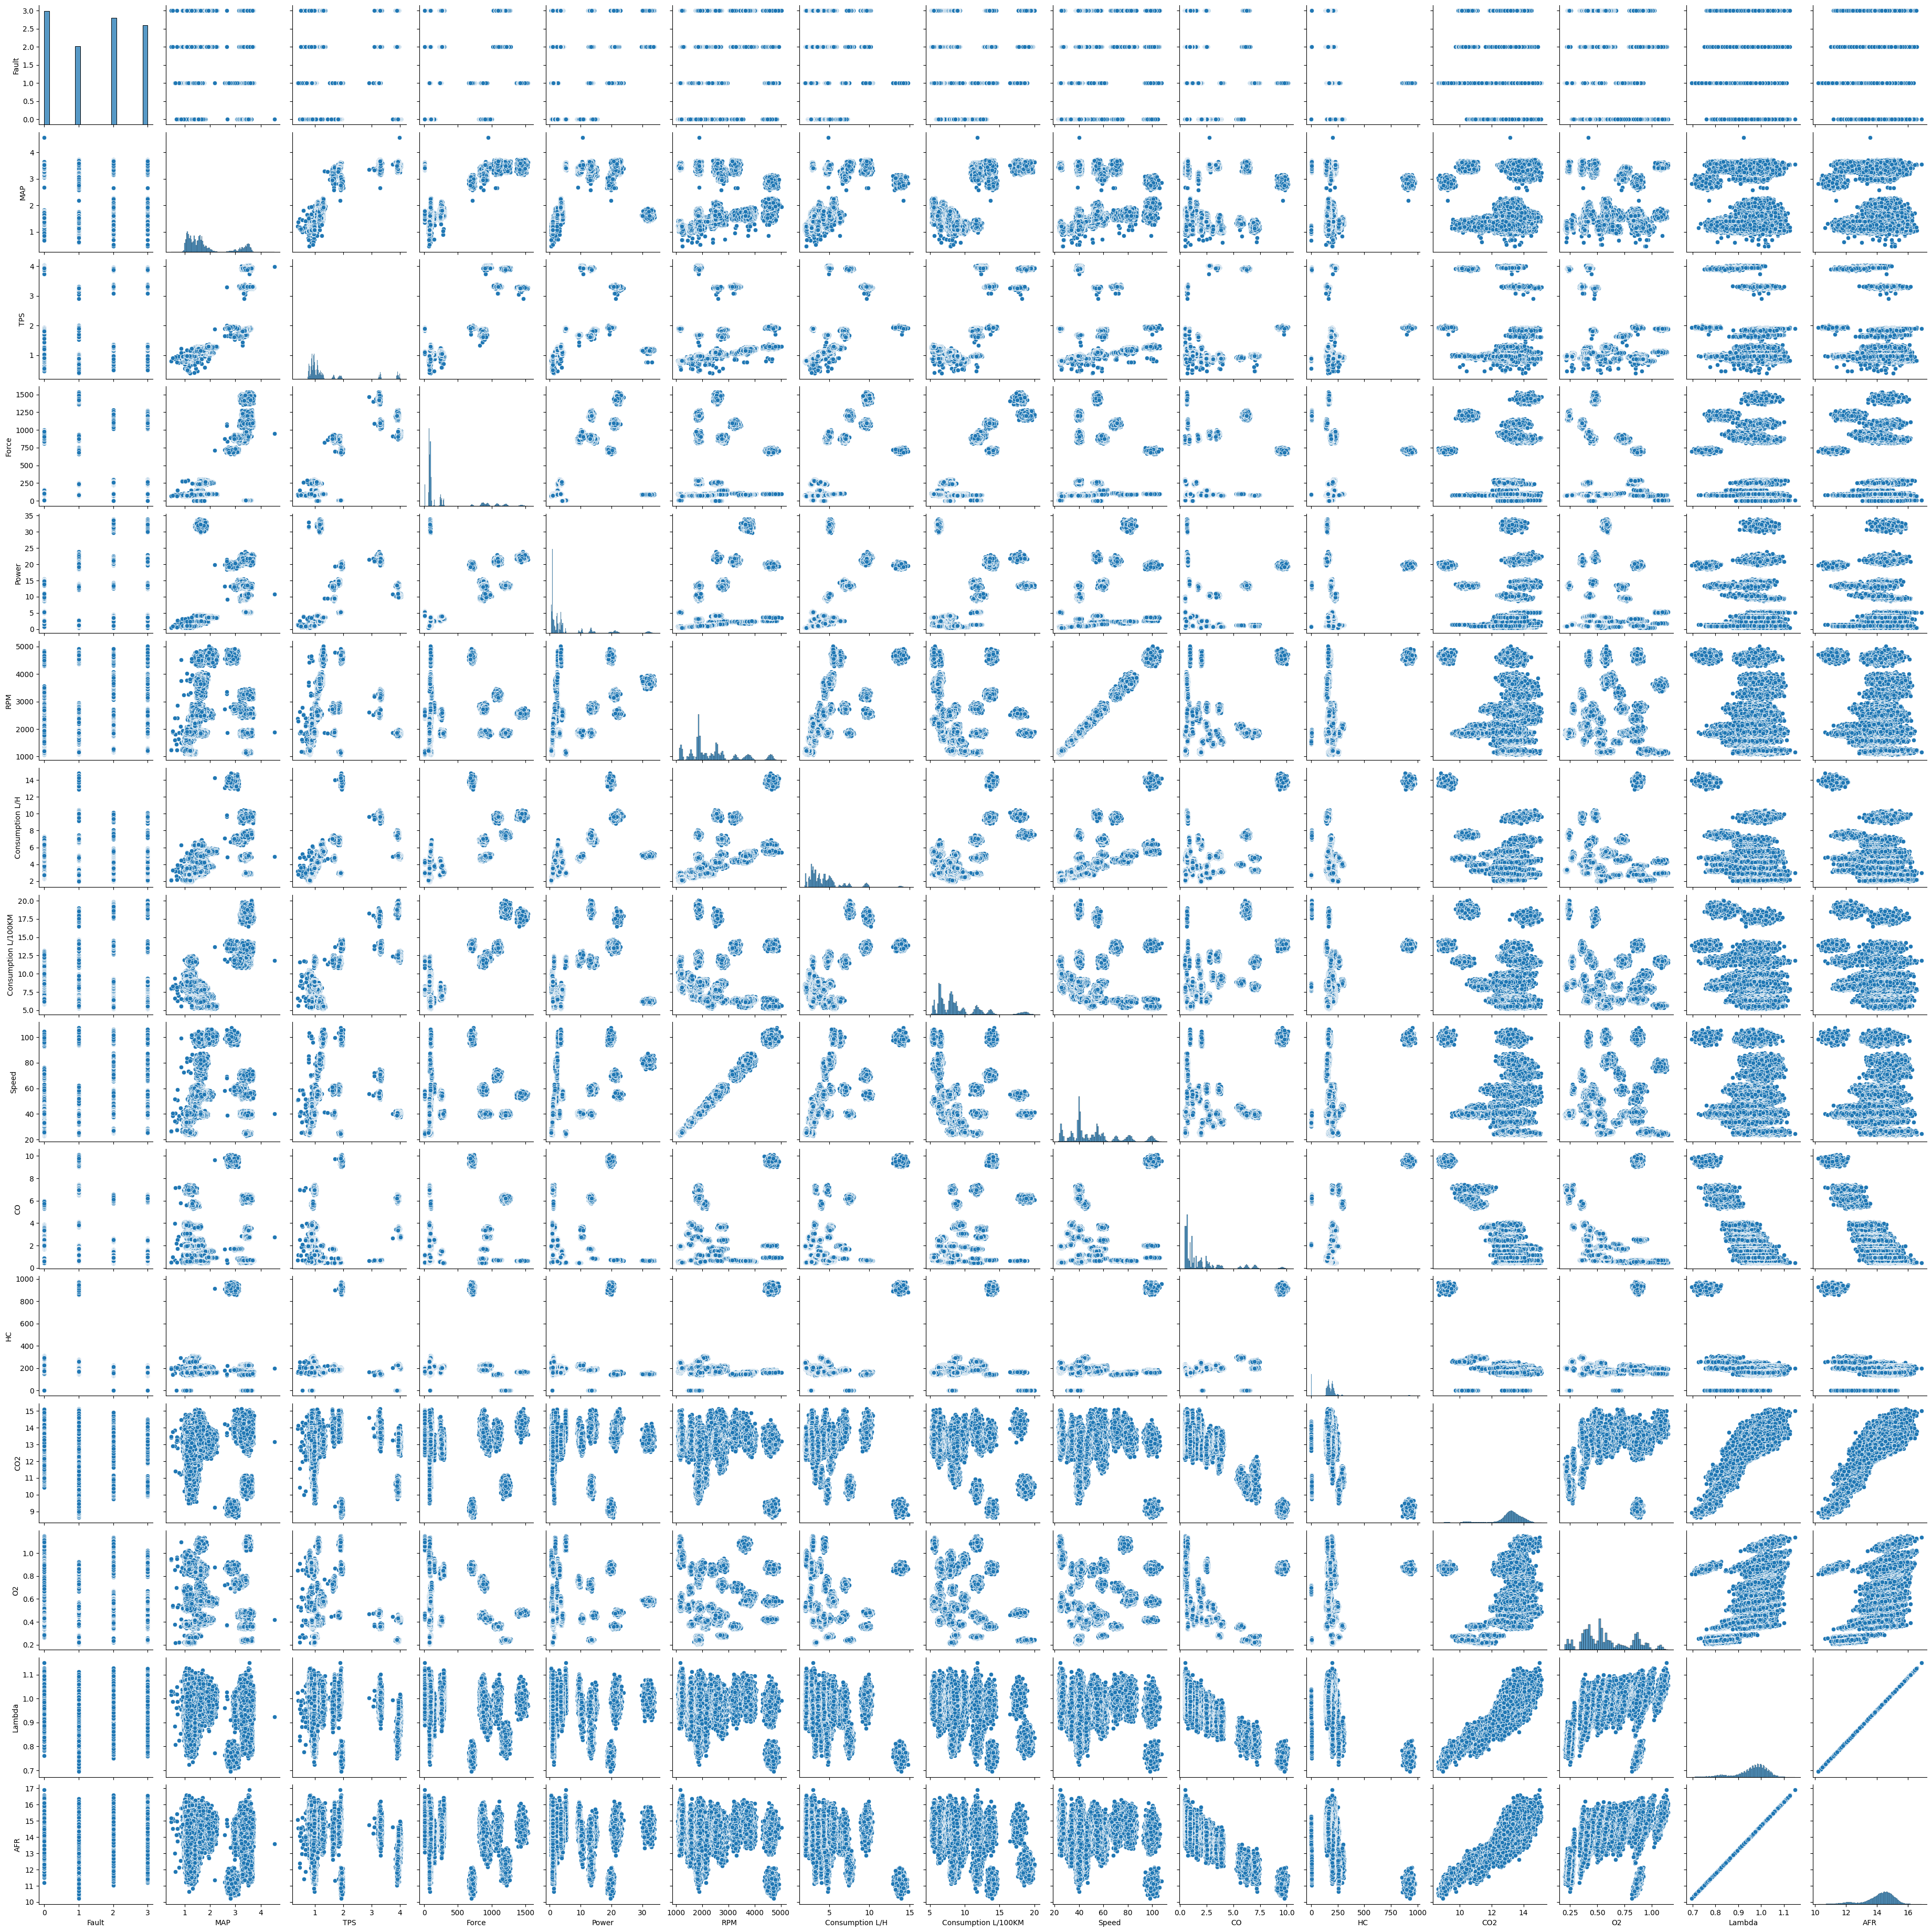

In [6]:
sns.pairplot(df);

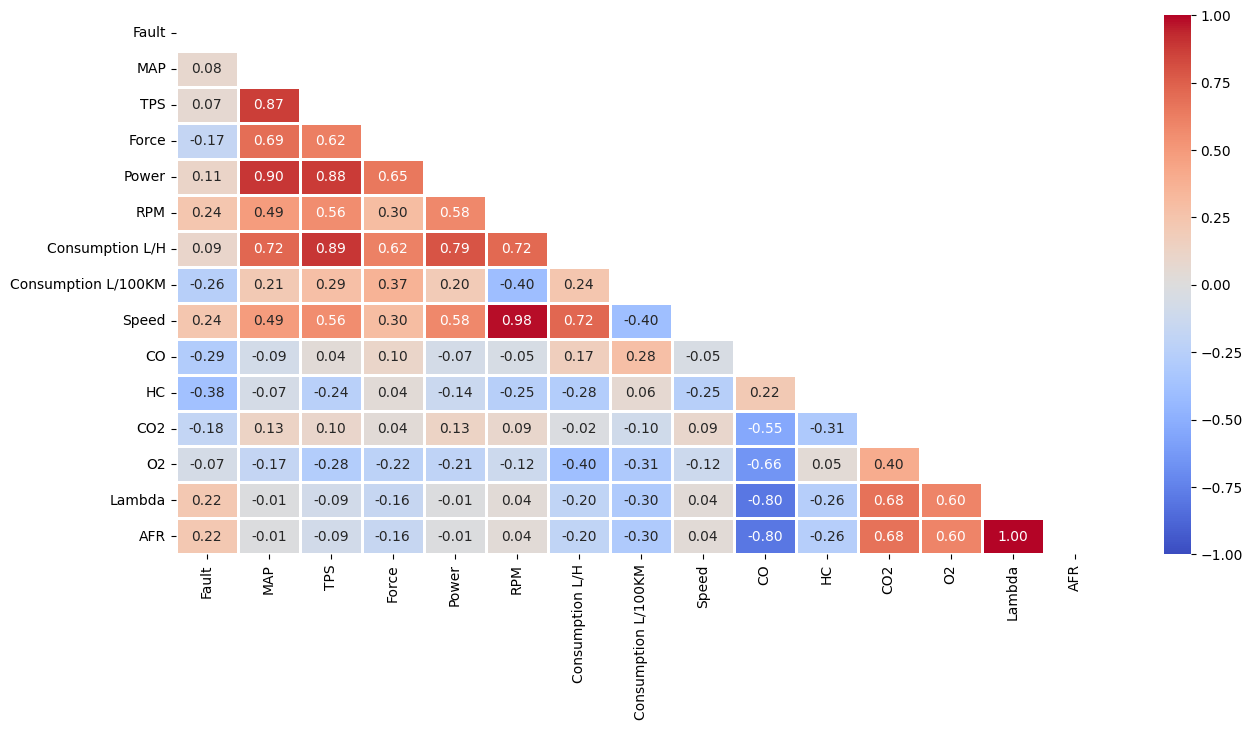

In [7]:
df_corr = df.corr('spearman')
mask =np.zeros_like(df_corr.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (15,7))
sns.heatmap(df_corr, mask=mask, linewidth=1, annot=True, fmt=".2f",cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

## Features dispersion by Fault type

In [8]:
def plot_kde_grid(
    df,
    hue_col,
    n_cols=5,
    figsize_per_col=4,
    figsize_per_row=3):
    
    """
    Plots KDE plots for each column in df (excluding hue_col)
    arranged in a grid with a fixed number of columns.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe
    hue_col : str
        Column used for hue (e.g., 'Fault')
    n_cols : int, default=5
        Number of columns in subplot grid
    figsize_per_col : int
        Width per column (in inches)
    figsize_per_row : int
        Height per row (in inches)
    """

    features = [c for c in df.columns if c != hue_col]
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)
    palette=["green", "orangered", "steelblue","k"]
    len_pallete = df[hue_col].nunique()

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_per_col * n_cols,
                 figsize_per_row * n_rows),
        squeeze=False
    )

    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.kdeplot(
            data=df,
            x=feature,
            hue=hue_col,
            palette=palette[:len_pallete],
            ax=axes[i]
        )
        axes[i].set_title(feature)

    # Remove empty subplots
    for j in range(n_features, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


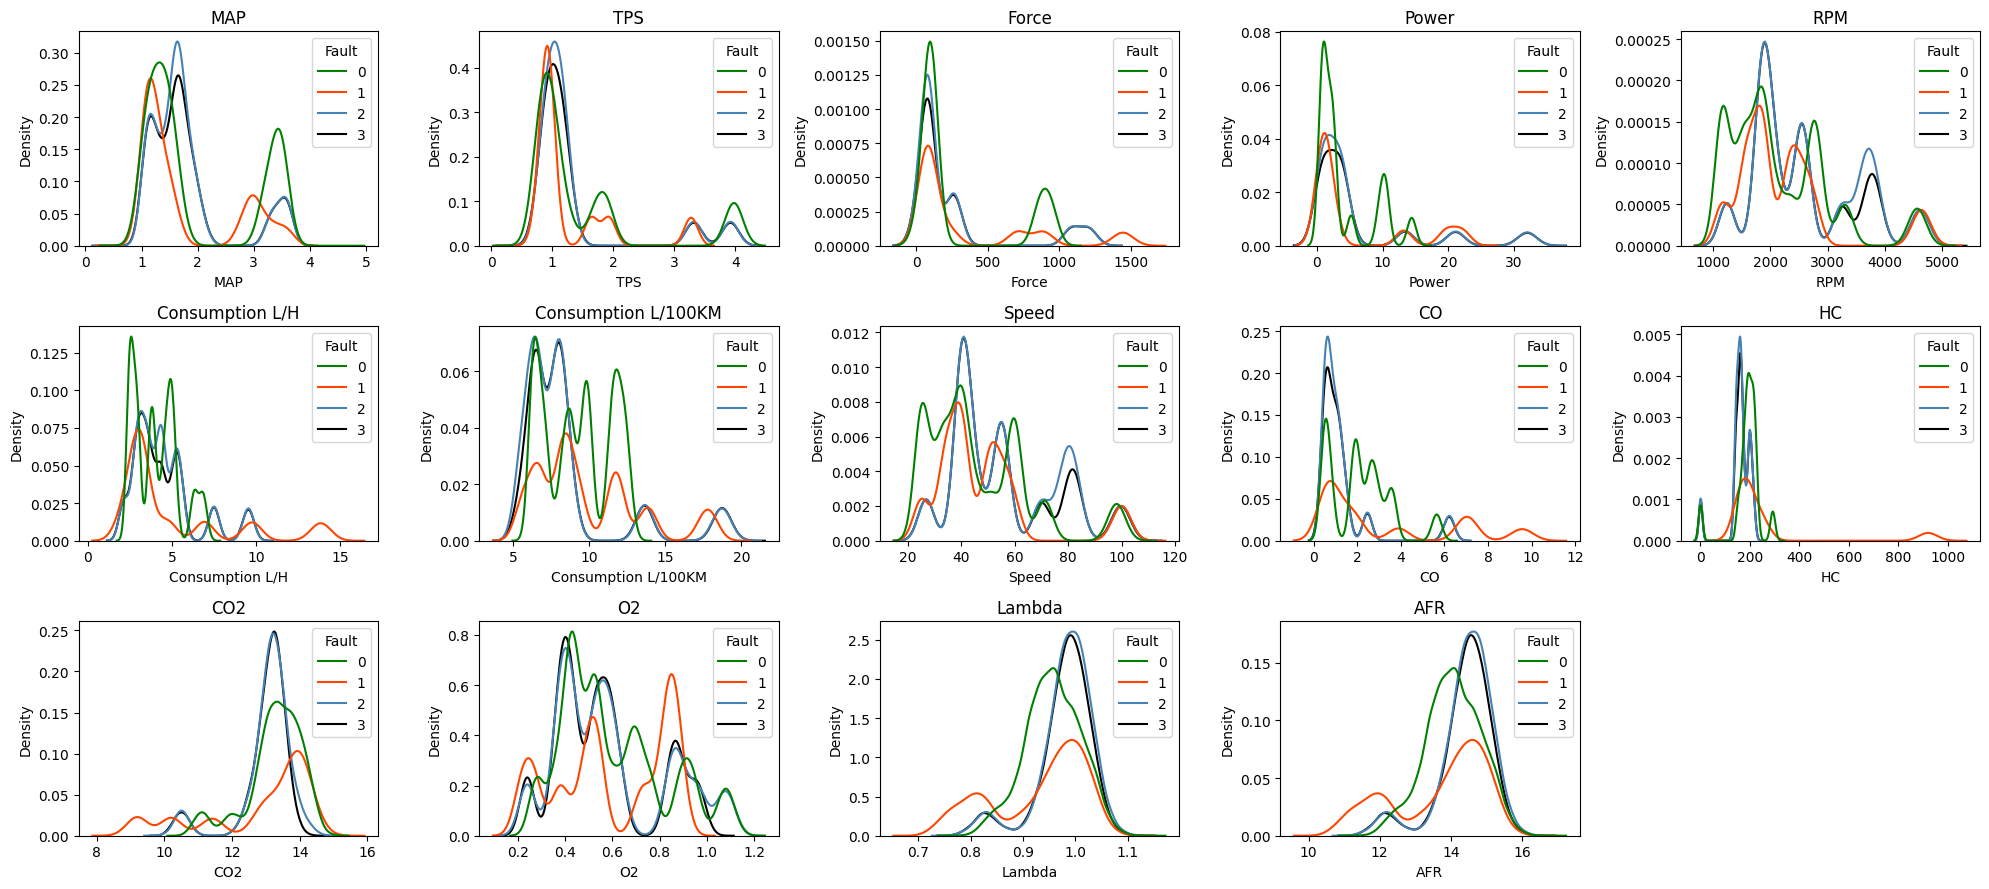

In [9]:
plot_kde_grid(
    df=df,
    hue_col="Fault",
    n_cols=5
    )


Fault
1    39999
0    16000
Name: count, dtype: int64

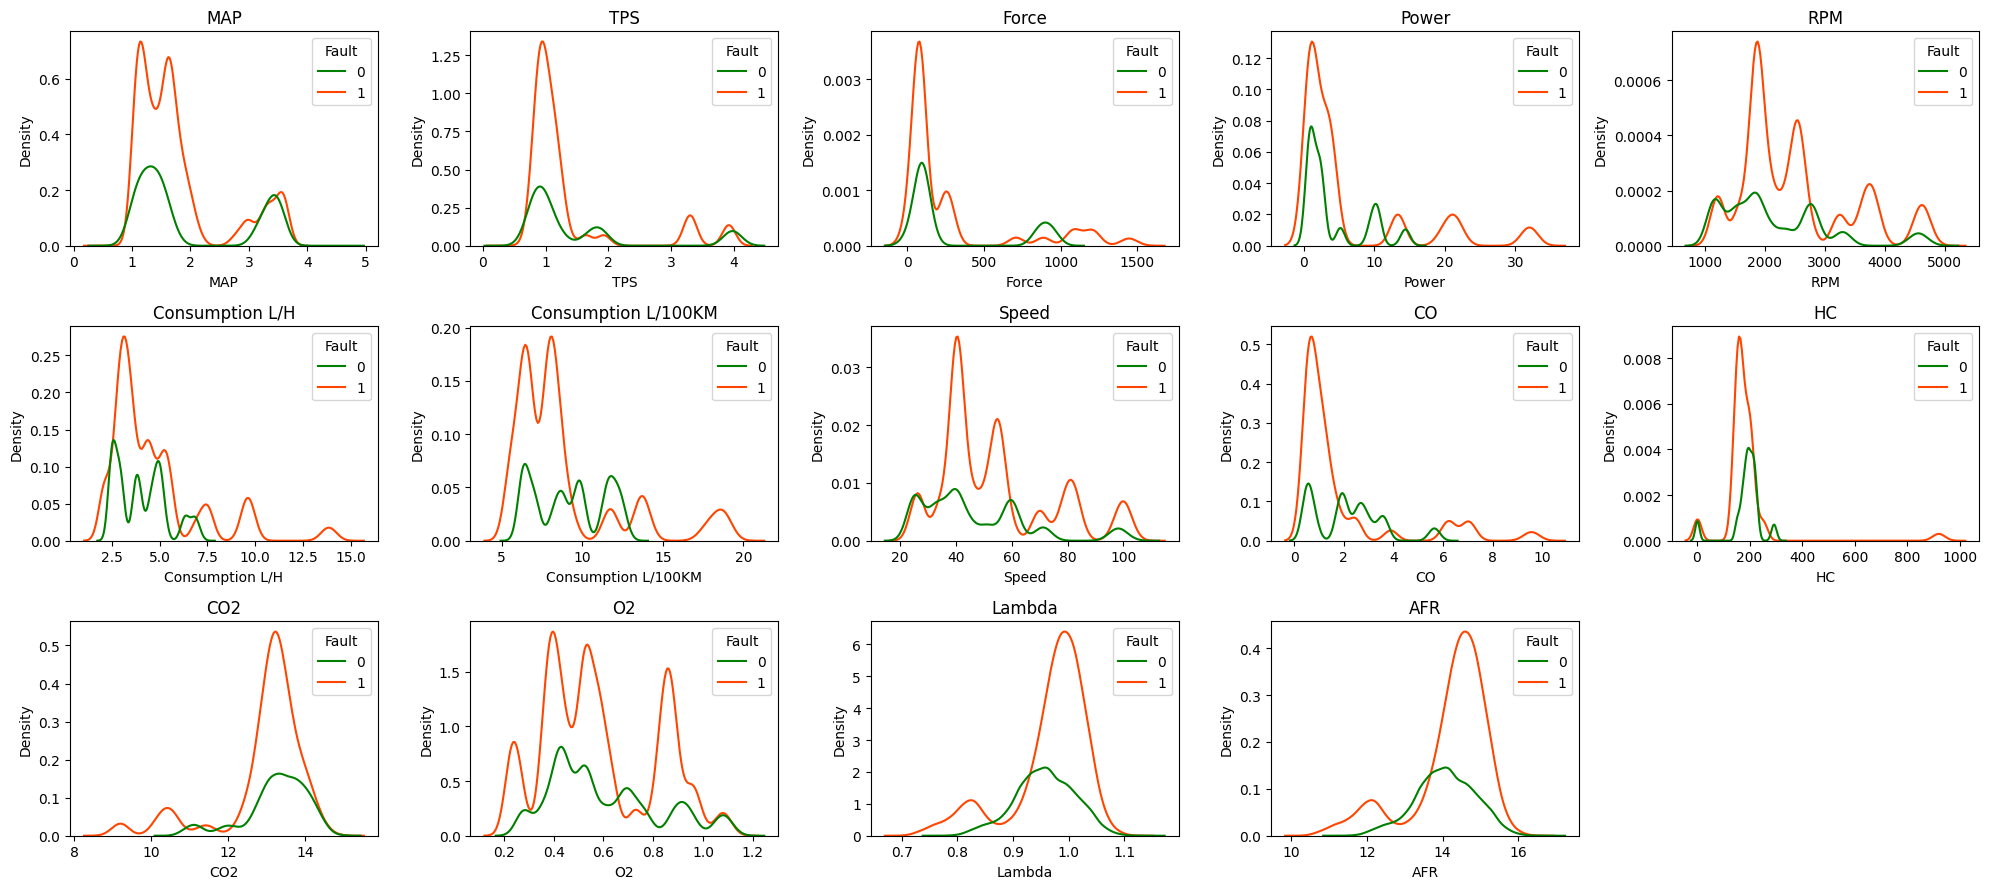

In [10]:
# Dividing the dataset in two parts: Fault(df_1) and No_fault (df_0), and then repeat the feature dispersion analysis

#No fault
df_0 = df[df['Fault']== 0].copy() #Healthy Dataset
df_binary = df.copy()
df_binary['Fault'] = df_binary['Fault'].map(lambda x: 1 if x > 0 else x)
display(df_binary['Fault'].value_counts())

plot_kde_grid(
    df=df_binary,
    hue_col="Fault",
    n_cols=5
    )


# Preliminary Analysis 1
* Even after splitting the dataset into “Healthy” and “Fault” samples, no statistically meaningful differences were observed in the distribution or dispersion of individual features when analyzed independently (e.g., via KDE plots). This suggests that potential fault patterns are not captured by marginal feature behavior alone, but rather by complex, multivariate and/or temporal relationships. Given this complexity, an Autoencoder-based approach will be explored to learn latent representations and detect anomalies through reconstruction error.

# 1. Prepare the Dataset for Training an Autoencoder:

This dataset contains 4 categories of faulty engine data:
- No fault (0)
- Fault type 1
- Fault type 2
- Fault type 3

As we are trying to get the autoencoder to realise what "healthy" engine data looks like, we don't need the faulty data, so the first step is to create a dataset of only the healthy data:


#### 1.1 Create the healthy dataset:

In [11]:
#Create a dataset for the healthy data:
df_0 = df[df['Fault']== 0].copy() #Healthy Dataset
df_0


Fault    MAP    TPS    Force   Power       RPM  Consumption L/H  \
0          0  3.549  1.889    7.428   5.227  1192.769            3.057   
1          0  3.559  1.899    7.646   5.327  1145.191            2.914   
2          0  3.539  1.899    7.578   5.100  1208.505            2.976   
3          0  3.519  1.889    7.371   5.255  1164.127            2.908   
4          0  3.549  1.879    7.405   5.177  1172.032            2.898   
...      ...    ...    ...      ...     ...       ...              ...   
15995      0  3.417  3.947  940.143  10.082  1878.276            4.906   
15996      0  3.437  3.947  943.044  10.137  1829.833            4.830   
15997      0  3.427  3.936  978.077  10.562  1763.290            4.872   
15998      0  3.498  3.957  918.678   9.851  1876.510            4.944   
15999      0  3.519  3.936  902.146  10.919  1946.056            5.048   

       Consumption L/100KM   Speed     CO       HC     CO2     O2  Lambda  \
0                   11.720  24.901  0.460  196.089  14.356  1.080   1.047   
1                   11.276  25.030  0.478  196.283  14.492  1.107   1.083   
2                   11.926  24.213  0.464  200.367  14.443  1.099   1.072   
3                   11.786  24.407  0.471  195.345  13.853  1.076   1.006   
4                   12.169  24.875  0.468  194.979  13.752  1.060   0.984   
...                    ...     ...    ...      ...     ...    ...     ...   
15995               12.091  39.378  3.475  223.179  13.083  0.414   0.873   
15996               12.205  39.837  3.579  226.249  13.289  0.435   0.934   
15997               12.253  39.979  3.509  226.530  12.878  0.423   0.880   
15998               12.734  41.213  3.393  227.955  12.883  0.426   0.887   
15999               12.630  40.280  3.349  228.457  12.909  0.433   0.903   

          AFR  
0      15.385  
1      15.926  
2      15.754  
3      14.787  
4      14.470  
...       ...  
15995  12.836  
15996  13.728  
15997  12.933  
15998  13.033  
15999  13.273  

[16000 rows x 15 columns]

In [12]:
#Remove the "Fault column" as we don't need it to understand the behavior of the data:
df_0 = df_0.drop("Fault", axis=1)
df_0.shape


(16000, 14)

In [13]:
# This is the feature vector that goes to the neural net
data_input = df_0.values
data_input


array([[3.54900e+00, 1.88900e+00, 7.42800e+00, ..., 1.08000e+00,
        1.04700e+00, 1.53850e+01],
       [3.55900e+00, 1.89900e+00, 7.64600e+00, ..., 1.10700e+00,
        1.08300e+00, 1.59260e+01],
       [3.53900e+00, 1.89900e+00, 7.57800e+00, ..., 1.09900e+00,
        1.07200e+00, 1.57540e+01],
       ...,
       [3.42700e+00, 3.93600e+00, 9.78077e+02, ..., 4.23000e-01,
        8.80000e-01, 1.29330e+01],
       [3.49800e+00, 3.95700e+00, 9.18678e+02, ..., 4.26000e-01,
        8.87000e-01, 1.30330e+01],
       [3.51900e+00, 3.93600e+00, 9.02146e+02, ..., 4.33000e-01,
        9.03000e-01, 1.32730e+01]], shape=(16000, 14))

#### 1.2 Train and Test Split

First generate the train and test split.
Then normalise the training data. Afterwards, perform normalisation on testing samples as well, but this time using the mean and variance of training  variables. In this way, we can test and evaluate whether our model can generalize well to new, unseen data points.


In [14]:
df_train, df_test = train_test_split(
        data_input, test_size=0.2, random_state=42)

print(f"df_train: {len(df_train)}")
print(f"df_test: {len(df_test)}")

df_train: 12800
df_test: 3200


It's good practice to normalise input data to the model. This can assist your neural network to learn faster.

In [15]:
# configure our pipeline
pipeline = Pipeline([('scaler', MinMaxScaler())])
pipeline.fit(df_train);

In [16]:
# transform the training and validation data with these parameters
df_train_norm = pipeline.transform(df_train)
df_test_norm = pipeline.transform(df_test)

# 2. Model Engineering and Training

### 2.1 Model Engineering

In [17]:
# get the input dimension for model which will be the number of features (Columns). In our case this is 14.
input_dimension = df_train_norm.shape[1]
input_dimension

14

In [18]:
#Define the autoencoder model
#Since we're dealing with numeric values we can use only Dense layers.

model = Sequential()
model.add(Dense(10, input_dim=input_dimension, activation='relu'))#input dimensions equal to number of features/columns
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(input_dimension, activation='sigmoid'))  # keep outputs in [0,1] # output dimensions equal to number of features/columns as we reconstructing the data


c:\MD\virtual_envs\kerasenv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Visualise the model we created.
tf.keras.utils.plot_model(model, rankdir="TB", show_shapes=True, show_layer_activations=True,show_layer_names=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [ ]:
# Specify the loss and optimiser
# We started with MSE as the reconstruction loss since it is a standard choice for autoencoders 
# and provides strong sensitivity to large deviations. 
# Depending on the observed false-positive rate and noise characteristics, 
# MAE can later be evaluated as a more robust alternative.

model.compile(loss='mean_squared_error', optimizer='adam')


In [22]:
#Look at the model's summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 14)             │           154 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 377 (1.47 KB)

 Trainable params: 377 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

### 2.2 Model Training

In [25]:
BATCH_SIZE = 128
EPOCHS = 200

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=15,
    restore_best_weights=True
)

history = model.fit(
    df_train_norm,
    df_train_norm,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(df_test_norm, df_test_norm),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0799 - val_loss: 0.0650
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0531 - val_loss: 0.0433
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0335 - val_loss: 0.0235
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0183 - val_loss: 0.0163
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 - val_loss: 0.0133
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0111 - val_loss: 0.0101
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0080
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0072 - val_loss: 0.0069
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0062
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 12/200
100/100 ━━━━━━━━━━━━━━━━━━━━

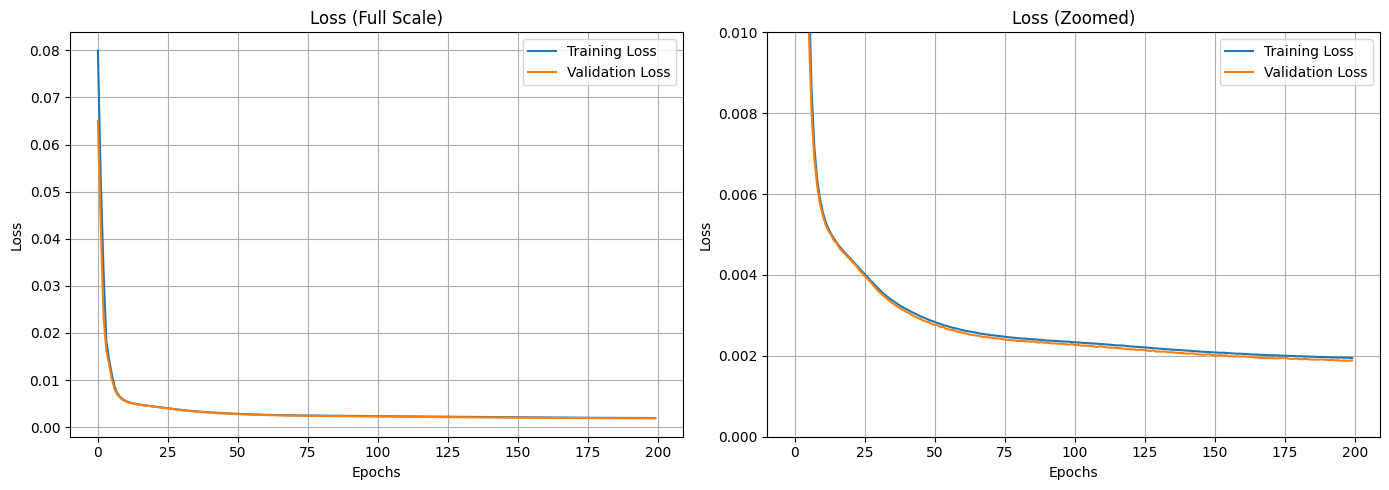

In [ ]:
#Visualise the history of training"

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Plot 1: Full scale ---
axes[0].plot(history.history["loss"], label="Training Loss")
axes[0].plot(history.history["val_loss"], label="Validation Loss")
axes[0].set_title("Loss (Full Scale)")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].grid(True)
axes[0].legend()

# --- Plot 2: Zoomed scale ---
axes[1].plot(history.history["loss"], label="Training Loss")
axes[1].plot(history.history["val_loss"], label="Validation Loss")
axes[1].set_title("Loss (Zoomed)")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].set_ylim(0, 0.01)
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

* The training and validation reconstruction losses decrease smoothly and remain closely aligned throughout training, indicating stable learning and good generalization on healthy data. No significant divergence is observed, suggesting that early stopping effectively prevents overfitting while preserving the model’s ability to generalize normal operating behavior.

* The zoomed view highlights subtle differences between training and validation losses near convergence. The absence of late-stage divergence confirms that the model does not excessively memorize healthy samples, which is critical to maintaining sensitivity to anomalous behavior.

# 3. Reconstruction Error:

First let's create the faulty dataset as we've done for test and training:
1. Drop the fault label
2. Normalise based on the pipeline before


In [35]:
df_1 = df[df['Fault']==1] #Unhealthy Dataset

df_1= df_1.drop("Fault", axis=1)
df_1= df_1.values
df_1_norm= pipeline.transform(df_1)
df_1_norm

array([[ 0.11191212,  0.08535565,  0.07358974, ...,  0.33295711,
         0.62371134,  0.62462778],
       [ 0.10470306,  0.08814505,  0.070909  , ...,  0.27878104,
         0.45360825,  0.45401997],
       [ 0.11191212,  0.09093445,  0.07338306, ...,  0.28329571,
         0.44845361,  0.44753897],
       ...,
       [ 0.7202197 ,  0.41478382,  0.70772293, ...,  0.67155756,
         0.03608247,  0.0364337 ],
       [ 0.68863714,  0.40920502,  0.70848611, ...,  0.6489842 ,
        -0.09020619, -0.08950779],
       [ 0.69584621,  0.40055788,  0.68087925, ...,  0.67607223,
        -0.05670103, -0.05640217]], shape=(10998, 14))

Calculate the mean absolute error between the reconstructions and real faulty data. We will then compare it to the mean absolute error for training and testing. The error should be atleast 50% higher than that of the healthy data.

In [37]:
reconstruction_faulty = model.predict(df_1_norm)
reconstruction_loss_anomalous =  np.mean(np.abs(df_1_norm - reconstruction_faulty), axis=1)
reconstruction_loss_anomalous


344/344 ━━━━━━━━━━━━━━━━━━━━ 0s 582us/step


array([0.08225148, 0.07821009, 0.07642759, ..., 0.6584929 , 0.69455188,
       0.688281  ], shape=(10998,))

In [38]:
reconstructions = model.predict(df_train_norm)
reconstruction_errors_normal_train = np.mean(np.abs(df_train_norm - reconstructions), axis=1)

400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step


In [39]:
reconstructions = model.predict(df_test_norm)
reconstruction_errors_normal_test = np.mean(np.abs(df_test_norm - reconstructions), axis=1)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step


In [40]:
print(f"Average Reconstruction Loss for test Data: {np.mean(reconstruction_errors_normal_test)}")
print(f"Average Reconstruction Loss for train Data: {np.mean(reconstruction_errors_normal_train)}")
print(f"Average Reconstruction Loss for Anomalous Data: {np.mean(reconstruction_loss_anomalous)}")

Average Reconstruction Loss for test Data: 0.028765122079874104
Average Reconstruction Loss for train Data: 0.028986737357639073
Average Reconstruction Loss for Anomalous Data: 0.15421330301611091


# Preliminary Analysis 2

* Erro médio (healthy) ≈ 0.028
* Erro médio (faulty) ≈ 0.154

📊 Interpretação técnica

* A razão entre os erros é ≈5.5×
* Isso é excelente separação para um autoencoder denso simples.

O que isso indica:


* O modelo aprendeu o manifold do comportamento saudável
* Dados anômalos:
* não são bem representados no espaço latente
* geram erro significativamente maior
* O AE não está colapsando (bom sinal)
📌 Esse é exatamente o comportamento esperado de um bom modelo de detecção de anomalias.

# Model Evaluation

## Objective

The goal of this Autoencoder is to detect anomalous (faulty) behavior by learning a compact representation of **normal (healthy)** operating conditions. The model is trained exclusively on healthy samples, allowing it to capture the underlying manifold of normal behavior. Samples that deviate from this manifold are expected to produce higher reconstruction errors and are therefore flagged as anomalies.

---

## Reconstruction Error

For each sample, a reconstruction error is computed between the original input vector **x** and its reconstructed output **x̂**. This notebook uses a **per-sample reconstruction error**, aggregated across features, defined as:

* **MAE (Mean Absolute Error)** per sample, averaged over all features, or
* **MSE (Mean Squared Error)** per sample, averaged over all features

Formally, for a sample ( i ) with ( d ) features:

[
\text{Reconstruction Error}*i = \frac{1}{d} \sum*{j=1}^{d} |x_{ij} - \hat{x}_{ij}|
]

Higher reconstruction error values indicate that the sample is poorly represented by the learned normal behavior and is therefore more likely to be anomalous.

---

## Separation Between Healthy and Faulty Samples

As an initial sanity check, we compare the reconstruction error distributions for:

* **Healthy data** (training and validation sets)
* **Faulty data** (test anomalies)

A strong separation—where faulty samples exhibit significantly higher reconstruction errors than healthy samples—indicates that the Autoencoder has successfully learned the normal operating region. In this notebook, the observed reconstruction error for faulty samples is several times higher than for healthy samples, suggesting good discriminative capability.

This step is essential to validate that the model is suitable for anomaly detection before defining any decision threshold.

---

## Threshold Selection

To convert reconstruction error into a binary decision (*normal* vs *anomalous*), a threshold **T** is defined using **only healthy data** from the validation set. This avoids information leakage from anomalous samples.

A common and robust approach is to set **T** as a high percentile of the healthy reconstruction error distribution, such as:

* 95th percentile (higher sensitivity)
* 99th percentile (balanced)
* 99.5th or 99.9th percentile (lower false positive rate)

This percentile-based strategy allows explicit control over the expected **false positive rate** on healthy data and aligns well with industrial anomaly detection requirements.

---

## Metrics

Once the threshold **T** is defined, the anomaly detector is evaluated using decision-oriented metrics:

* **False Positive Rate (FPR)** on healthy data
  – How often normal samples are incorrectly flagged as anomalies

* **True Positive Rate (Recall)** on faulty data
  – How many actual anomalies are correctly detected

* **Precision**
  – The proportion of detected anomalies that are truly faulty

* **F1-score**
  – Harmonic mean of precision and recall, useful when fault events are rare

These metrics provide a clear view of the trade-off between early detection and false alarms, which is critical for operational deployment.

---

## Interpretation

The combination of clear reconstruction error separation, percentile-based thresholding, and decision-oriented metrics provides a robust and interpretable evaluation framework. This confirms that the Autoencoder functions effectively as a **predictive anomaly detection model**, suitable as an early-warning layer in a larger diagnostic or prescriptive architecture.

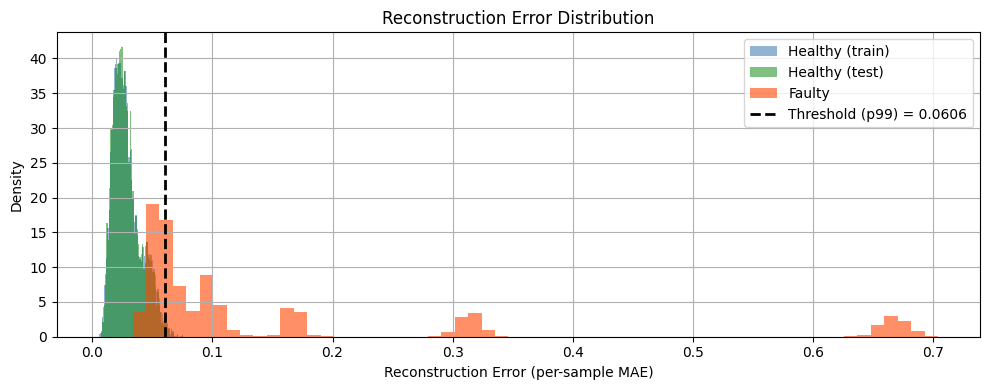

In [57]:
# # Exemplo de threshold por percentil do healthy (val ou train)
# healthy_ref = reconstruction_errors_normal_test if 'reconstruction_errors_normal_test' in globals() else reconstruction_errors_normal_train
# threshold = np.percentile(healthy_ref, 99)  # 99, 99.5, 99.9 conforme tolerância a FP

# plt.figure(figsize=(10,4))
# plt.hist(reconstruction_errors_normal_train, bins=60, alpha=0.6, density=True, label='Healthy (train)')
# if 'reconstruction_errors_normal_test' in globals():
#     plt.hist(reconstruction_errors_normal_test, bins=60, alpha=0.6, density=True, label='Healthy (test)')
# plt.hist(reconstruction_loss_anomalous, bins=60, alpha=0.6, density=True, label='Faulty')

# plt.axvline(threshold, linestyle='--', linewidth=2, label=f'Threshold (p99) = {threshold:.4f}')
# plt.title("Reconstruction Error Distribution")
# plt.xlabel("Reconstruction Error (per-sample MAE)")
# plt.ylabel("Density")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

# Threshold based on healthy reference
healthy_ref = reconstruction_errors_normal_test if 'reconstruction_errors_normal_test' in globals() else reconstruction_errors_normal_train
threshold = np.percentile(healthy_ref, 99)

plt.figure(figsize=(10,4))

# Healthy - train (steelblue)
plt.hist(
    reconstruction_errors_normal_train,
    bins=60,
    alpha=0.6,
    density=True,
    color='steelblue',
    label='Healthy (train)'
)

# Healthy - test (blue)
if 'reconstruction_errors_normal_test' in globals():
    plt.hist(
        reconstruction_errors_normal_test,
        bins=60,
        alpha=0.5,
        density=True,
        color='green',
        label='Healthy (test)'
    )

# Faulty (orange-red)
plt.hist(
    reconstruction_loss_anomalous,
    bins=60,
    alpha=0.6,
    density=True,
    color='orangered',
    label='Faulty'
)

# Threshold line
plt.axvline(
    threshold,
    linestyle='--',
    linewidth=2,
    color='black',
    label=f'Threshold (p99) = {threshold:.4f}'
)

plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error (per-sample MAE)")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* The reconstruction error distribution for faulty samples is clearly shifted to the right compared to healthy samples. This separation indicates that the autoencoder successfully learned the normal operating manifold and produces significantly higher reconstruction errors for anomalous conditions.

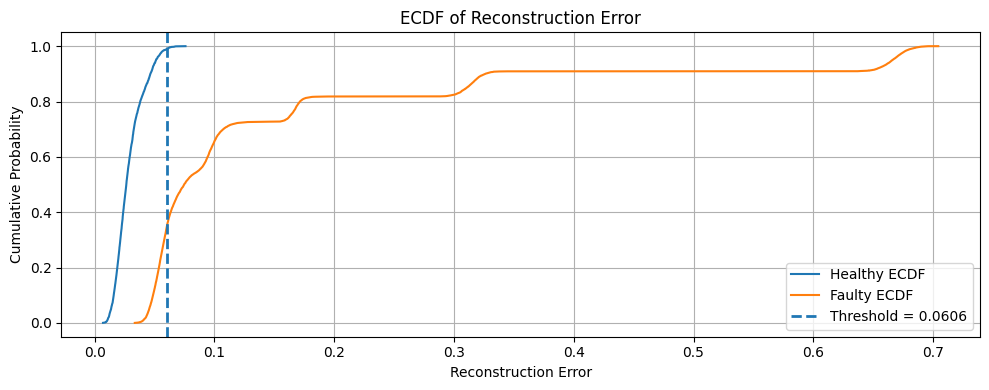

In [43]:
def ecdf(x):
    x = np.sort(x)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

xh, yh = ecdf(healthy_ref)
xf, yf = ecdf(reconstruction_loss_anomalous)

plt.figure(figsize=(10,4))
plt.plot(xh, yh, label='Healthy ECDF')
plt.plot(xf, yf, label='Faulty ECDF')
plt.axvline(threshold, linestyle='--', linewidth=2, label=f'Threshold = {threshold:.4f}')
plt.title("ECDF of Reconstruction Error")
plt.xlabel("Reconstruction Error")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* The ECDF plot provides a transparent, non-parametric view of reconstruction error distributions. The anomaly threshold is defined as a high percentile of the healthy error distribution, enabling explicit control of the expected false positive rate while retaining strong detection capability for faulty samples.

* The vertical line represents the selected anomaly threshold based exclusively on healthy validation data. Samples with reconstruction error above this threshold are flagged as anomalous, ensuring that the decision boundary is not biased by faulty data.

C:\Users\M4005001\AppData\Local\Temp\ipykernel_13360\3639919767.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=True)


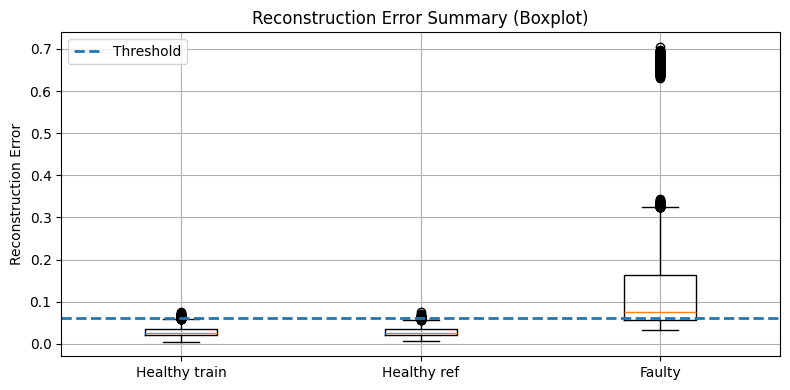

In [44]:
plt.figure(figsize=(8,4))
data = [reconstruction_errors_normal_train, healthy_ref, reconstruction_loss_anomalous]
labels = ['Healthy train', 'Healthy ref', 'Faulty']
plt.boxplot(data, labels=labels, showfliers=True)
plt.axhline(threshold, linestyle='--', linewidth=2, label='Threshold')
plt.title("Reconstruction Error Summary (Boxplot)")
plt.ylabel("Reconstruction Error")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

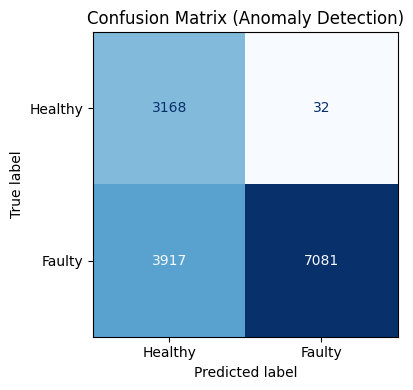

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Healthy", "Faulty"]
)

fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap="Blues", colorbar=False)

ax.set_title("Confusion Matrix (Anomaly Detection)")
plt.grid(False)
plt.tight_layout()
plt.show()

* The confusion matrix summarizes the detector’s performance at the chosen threshold, highlighting the trade-off between false positives on healthy data and true positive detection of faulty samples. This representation supports decision-oriented evaluation rather than purely descriptive analysis.

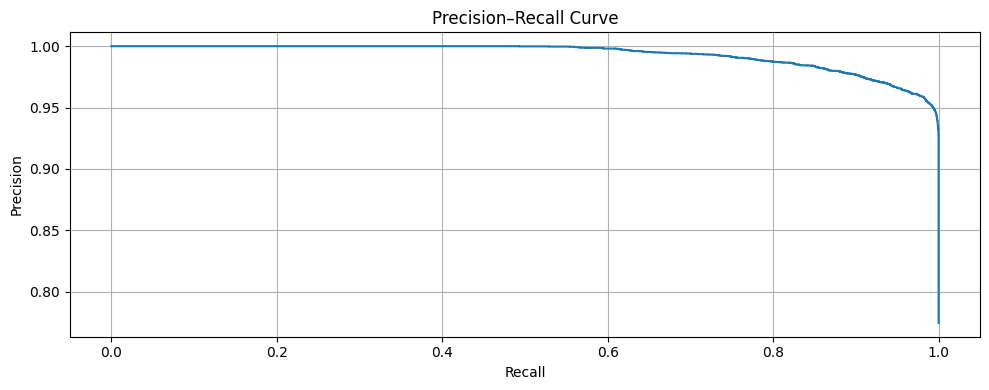

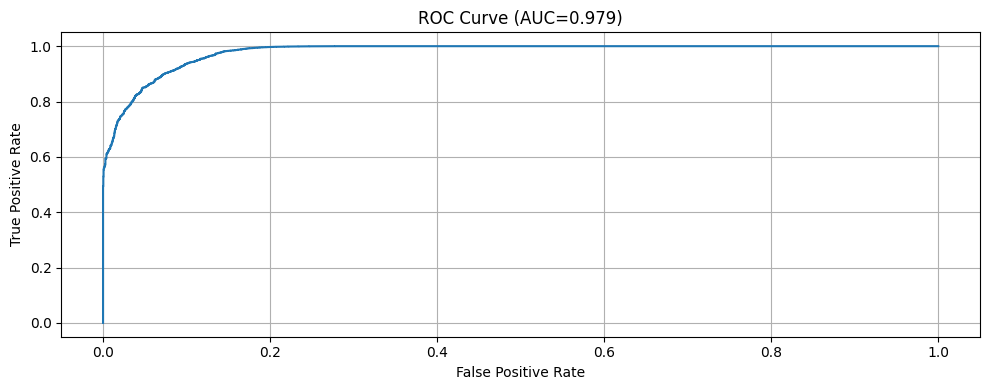

In [62]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

prec, rec, thr = precision_recall_curve(y_true, scores)
fpr, tpr, thr_roc = roc_curve(y_true, scores)

plt.figure(figsize=(10,4))
plt.plot(rec, prec)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(fpr, tpr)
plt.title(f"ROC Curve (AUC={auc(fpr,tpr):.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


* PR - AUC: The precision–recall curve illustrates the trade-off between detection sensitivity and false alarms across different thresholds. This curve is particularly informative in anomaly detection scenarios, where faulty samples are rare and class imbalance is significant.

* ROC - AUC: The ROC curve shows the relationship between true positive rate and false positive rate across thresholds. A curve significantly above the diagonal indicates strong discriminative power of the reconstruction error as an anomaly score.

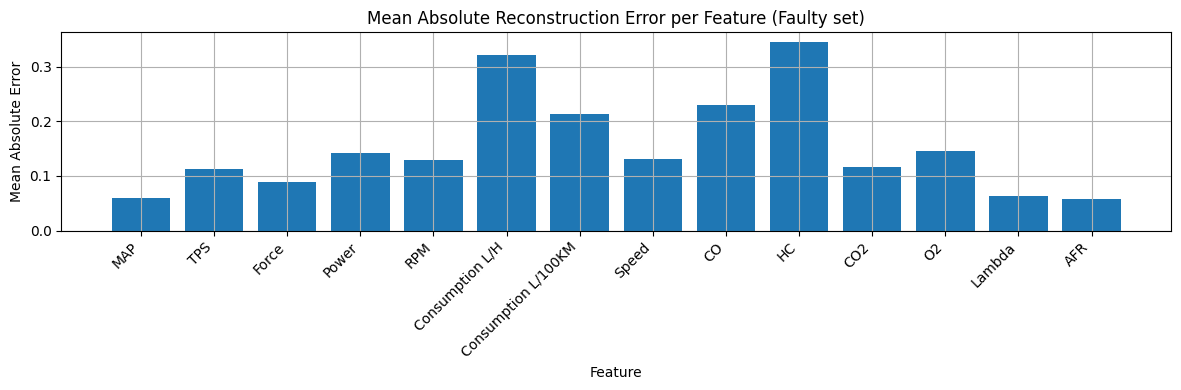

In [ ]:
# Para um conjunto faulty (ou subset), calcule erro absoluto médio por feature:
abs_err = np.abs(df_1_norm - reconstruction_faulty)  # matrizes (n_samples, n_features)
feat_err = abs_err.mean(axis=0)

feature_names = df.columns[1:]

plt.figure(figsize=(12,4))
plt.bar(feature_names, feat_err)
plt.xticks(rotation=45, ha='right')
plt.title("Mean Absolute Reconstruction Error per Feature (Faulty set)")
plt.xlabel("Feature")
plt.ylabel("Mean Absolute Error")
plt.grid(True)
plt.tight_layout()
plt.show()


* This plot shows the mean absolute reconstruction error per feature for faulty samples. Features with higher errors contribute more strongly to the anomaly score, providing a high-level, non-causal indication of which variables deviate most from learned normal behavior.

* Comparing feature-wise reconstruction errors between healthy and faulty samples highlights which variables exhibit abnormal behavior during fault conditions, supporting expert-driven diagnostic analysis without implying direct causality.

# Final Conclusion

* Overall, the evaluation confirms that reconstruction error is a reliable anomaly score, enabling controlled threshold-based detection and interpretable assessment of abnormal behavior while remaining aligned with industrial operational constraints.

### 5. Save the Model

In [41]:
model.save("autoencoder.h5")